In [1756]:
import os, json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

Note: I am using raw dataset as provided without any changes on dataset, as I am using windows 10 operating system, so I used `ANSI` encoding, there are other encoding also can work like `iso-8859-1` but I choose `ANSI` in case if you are runing on another machine(OS) and if you find any dificulty or getting any error related to encoding please feel free to change encoding to `iso-8859-1`, but some of the observation may not match.
So for given result to run on windows 10 OS.
Thanks.

#### Please add this file into current directory where all source data present.

In [1757]:
# For Windos OS we can use encoding=ANSI
companies_df = pd.read_csv("./companies.txt", sep="\t", encoding = "ANSI")
rounds2_df = pd.read_csv("./rounds2.csv",encoding = "ANSI")
mapping_df = pd.read_csv("./mapping.csv",encoding = "ANSI")

# Checkpoint 1:

In [1758]:
#Converting company_permalink column into lower case as link column
rounds2_df['link'] = rounds2_df.company_permalink.str.lower()

#Converting permalink column into lower case as link column
companies_df['link'] = companies_df.permalink.str.lower()


In [1759]:
#How many unique companies are present in rounds2?
print("How many unique companies are present in rounds2? : ",len(rounds2_df.link.unique()))


#How many unique companies are present in companies?
print("How many unique companies are present in companies? : ",len(companies_df.link.unique()))



How many unique companies are present in rounds2? :  66368
How many unique companies are present in companies? :  66368


In [1760]:
master_frame = pd.merge(companies_df, rounds2_df, how='inner', on='link')
master_frame1 = pd.merge(companies_df, rounds2_df, how='outer', on='link')

In [1761]:
# Question: Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

print('inner Join : ',master_frame.info())
print('-------------------------')
print('outer join : ',master_frame1.info())

#Ans to this question is NO as we are using inner join follow the bellow #Observation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114888 entries, 0 to 114887
Data columns (total 17 columns):
permalink                  114888 non-null object
name                       114887 non-null object
homepage_url               108759 non-null object
category_list              111497 non-null object
status                     114888 non-null object
country_code               106243 non-null object
state_code                 103977 non-null object
region                     104754 non-null object
city                       104757 non-null object
founded_at                 94392 non-null object
link                       114888 non-null object
company_permalink          114888 non-null object
funding_round_permalink    114888 non-null object
funding_round_type         114888 non-null object
funding_round_code         31133 non-null object
funded_at                  114888 non-null object
raised_amount_usd          94924 non-null float64
dtypes: float64(1), object(16)
memory usa

## As we can see above after merging on link column there is no null value present in permalink and coumpany_permalink, which means it's take the interscetion of both data set.

Observation1 : Now you can say in master_frame all common rounds2_df and companies_df dataframe present..
Observation2: If we do a outer join there would be additional rouds2_df column get merged, which means there would be some extra rounds2_df column which is not present in countries_df.
Note: as per the above observation will go with inner join so that there would be no null value after mearging for link, permalink, company_permalinks columns.

### I found there are some difference in outer and inner merging which is #116
SO will go with inner, also I have investigate there are some changes in mean calculation while doing outer join. 

In [1762]:
#Question: How many observations are present in master_frame?
print('No of Observation present in master_frame is : ', len(master_frame))

No of Observation present in master_frame is :  114888


# Checkpoint 2:  Fund Type Analysis

In [1763]:
#Converting raised_amount_usd to million USD
master_frame['raised_amount_usd_in_million']=(master_frame.raised_amount_usd)/1000000

In [1764]:
# Grouping by funding_round_type
master_frame_by_funding_round_type = master_frame.groupby('funding_round_type')

In [1765]:
master_frame_by_funding_round_type['raised_amount_usd_in_million'].mean()

funding_round_type
angel                      0.958694
convertible_note           1.456387
debt_financing            17.043526
equity_crowdfunding        0.539113
grant                      4.312660
non_equity_assistance      0.411203
post_ipo_debt            168.704572
post_ipo_equity           82.182494
private_equity            73.341462
product_crowdfunding       1.363131
secondary_market          79.649630
seed                       0.719719
undisclosed               19.252764
venture                   11.749431
Name: raised_amount_usd_in_million, dtype: float64

### Now we can see above best investment between 5-15 million would be venture fund type
chosen investment type = 'venture'

# Checkpoint 3: Country Analysis

In [1766]:
# Top 9 country list based on the total investment amount each country has received.
top_9_country_list = master_frame.loc[master_frame['funding_round_type']=='venture'].groupby(['country_code']).raised_amount_usd_in_million.sum().sort_values(ascending = False).head(9)
pd.DataFrame(top_9_country_list)

,raised_amount_usd_in_million
country_code,
USA,422510.842796
CHN,39835.418773
GBR,20245.627416
IND,14391.858718
CAN,9583.332317
FRA,7241.142340
ISR,6907.514579
DEU,6345.559822
JPN,3363.676611


In [1767]:
top_9_filter_country_code = ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'] 
top9 = master_frame[master_frame['country_code'].isin(top_9_filter_country_code)]

# Top 9 country list based on the total investment amount each country has received.
top9['total_funding'] = top9['country_code'].apply(lambda category: top_9_country_list[category])
top9.head()

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,link,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,total_funding
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.0,14391.858718
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,422510.842796
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,0.7,422510.842796
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.0,39835.418773
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,NaN,422510.842796


### Observation:  top9 english speaking country: 
    As we can see out of top9 these are top 3 english speaking country.
    USA(United State of America), GBR(United Kingdom) and IND(India)

# Checkpoint 4: Sector Analysis 1

### Cleaning Mapping File

In [1768]:
#As we can see only one row has Blanks=1 so we can replace.
mapping_df[mapping_df.Blanks==1]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


In [1769]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1770]:
#There are some category_list which contains 0 charcter in between we can cleanup those value with na to get result. 
mapping_df['category_list']=pd.DataFrame(mapping_df['category_list'].str.replace('0','na'))

In [1771]:
#We can drop the NAN row
mapping_df=mapping_df.dropna()
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Blanks                                     687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [1772]:
# In this section We will create the main sector based on the category_list and it's corresponding main sector. 
def populate_main_sector(row,columns):
    return columns[np.argmax(row.values)]

# Now use lambda to call this function to your mapping file:
mapping_df['main_sector'] = mapping_df.apply(lambda x : populate_main_sector(x[1:10], mapping_df.columns[1:10]), axis=1)
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,0,1,0,0,0,0,Health


# Prepare master_frame

In [1773]:
#Now prepare the master frame with primary sector
master_frame['primary_sector']=pd.DataFrame(master_frame.category_list.str.split('|').str.get(0))
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,link,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,primary_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.000000,Media
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,Application Platforms
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,0.700000,Application Platforms
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,3.406878,Apps
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.000000,Curated Web


In [1774]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                        0.00
name                             0.00
homepage_url                     5.33
category_list                    2.95
status                           0.00
country_code                     7.52
state_code                       9.50
region                           8.82
city                             8.82
founded_at                      17.84
link                             0.00
company_permalink                0.00
funding_round_permalink          0.00
funding_round_type               0.00
funding_round_code              72.90
funded_at                        0.00
raised_amount_usd               17.38
raised_amount_usd_in_million    17.38
primary_sector                   2.95
dtype: float64

In [1775]:
# As we can see there are some null value in category_list which we can remove for furthere analysis
master_frame = master_frame.dropna(subset = ['category_list'])
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                        0.00
name                             0.00
homepage_url                     4.63
category_list                    0.00
status                           0.00
country_code                     6.27
state_code                       8.25
region                           7.57
city                             7.57
founded_at                      16.75
link                             0.00
company_permalink                0.00
funding_round_permalink          0.00
funding_round_type               0.00
funding_round_code              72.51
funded_at                        0.00
raised_amount_usd               15.80
raised_amount_usd_in_million    15.80
primary_sector                   0.00
dtype: float64

In [1776]:
# populate main_sector in master_frame with the help of mapping data frame
#NOTE: it will take some time to map all main_sector.

def match(row):
    return mapping_df[mapping_df['category_list']==row].main_sector.values

master_frame['main_sector'] = master_frame.apply(lambda x : match(x['primary_sector']), axis=1)

master_frame['main_sector']=pd.DataFrame(master_frame['main_sector'].str.get(0))
master_frame.head()

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,link,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,primary_sector,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.000000,Media,Entertainment
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,Application Platforms,"News, Search and Messaging"
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,0.700000,Application Platforms,"News, Search and Messaging"
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,3.406878,Apps,"News, Search and Messaging"
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.000000,Curated Web,"News, Search and Messaging"


In [1777]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111497 entries, 0 to 114887
Data columns (total 20 columns):
permalink                       111497 non-null object
name                            111496 non-null object
homepage_url                    106335 non-null object
category_list                   111497 non-null object
status                          111497 non-null object
country_code                    104507 non-null object
state_code                      102295 non-null object
region                          103052 non-null object
city                            103055 non-null object
founded_at                      92822 non-null object
link                            111497 non-null object
company_permalink               111497 non-null object
funding_round_permalink         111497 non-null object
funding_round_type              111497 non-null object
funding_round_code              30649 non-null object
funded_at                       111497 non-null object
raised_amou

In [1778]:
#As we can see There are some main_sector does not belongs to any category so we can remove that as well 
master_frame = master_frame.dropna(subset = ['main_sector'])
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                        0.00
name                             0.00
homepage_url                     4.63
category_list                    0.00
status                           0.00
country_code                     6.28
state_code                       8.26
region                           7.58
city                             7.57
founded_at                      16.74
link                             0.00
company_permalink                0.00
funding_round_permalink          0.00
funding_round_type               0.00
funding_round_code              72.50
funded_at                        0.00
raised_amount_usd               15.81
raised_amount_usd_in_million    15.81
primary_sector                   0.00
main_sector                      0.00
dtype: float64

In [1779]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111105 entries, 0 to 114887
Data columns (total 20 columns):
permalink                       111105 non-null object
name                            111104 non-null object
homepage_url                    105966 non-null object
category_list                   111105 non-null object
status                          111105 non-null object
country_code                    104133 non-null object
state_code                      101931 non-null object
region                          102686 non-null object
city                            102689 non-null object
founded_at                      92510 non-null object
link                            111105 non-null object
company_permalink               111105 non-null object
funding_round_permalink         111105 non-null object
funding_round_type              111105 non-null object
funding_round_code              30549 non-null object
funded_at                       111105 non-null object
raised_amou

In [1780]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,link,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,primary_sector,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.000000,Media,Entertainment
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,NaN,Application Platforms,"News, Search and Messaging"
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,0.700000,Application Platforms,"News, Search and Messaging"
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,3.406878,Apps,"News, Search and Messaging"
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.000000,Curated Web,"News, Search and Messaging"


# Checkpoint 5: Sector Analysis 2

In [1781]:
#Prepare D1,D2,D3 DataFrame as for each country USA,GBR,IND respectively from master_frame
D1=master_frame.loc[master_frame['country_code']=='USA']
D2=master_frame.loc[master_frame['country_code']=='GBR']
D3=master_frame.loc[master_frame['country_code']=='IND']

In [1782]:
#Filtering D1,D2,D3 DataFrame between 5-15 million USD investment

D1 = D1[D1['raised_amount_usd_in_million'].between(5,15)]
D2 = D2[D2['raised_amount_usd_in_million'].between(5,15)]
D3 = D3[D3['raised_amount_usd_in_million'].between(5,15)]

In [1783]:
#Filtering D1,D2,D3 DataFrame for VENTURE type funding as this our FT

D1 = D1.loc[D1['funding_round_type']=='venture']
D2 = D2.loc[D2['funding_round_type']=='venture']
D3 = D3.loc[D3['funding_round_type']=='venture']

### Count of investment and ammount of investment based on main_sector for - D1 DataFrame(USA)

In [1784]:
#Count_of_investment and ammount_of_investment as per main_sector
D1ByMainSector = D1.groupby('main_sector')

count_investment_usa_series = D1ByMainSector['raised_amount_usd_in_million'].count().sort_values(ascending = False)
amount_of_investment_in_each_main_sector_in_USA = D1ByMainSector['raised_amount_usd_in_million'].sum().sort_values(ascending = False)

#Populating into count_of_investment and amount_of_investment column in D1 data frame.
D1['count_of_investment'] = D1['main_sector'].apply(lambda category: count_investment_usa_series[category])
D1['amount_of_investment'] = D1['main_sector'].apply(lambda category: amount_of_investment_in_each_main_sector_in_USA[category])
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,primary_sector,main_sector,count_of_investment,amount_of_investment
12,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,8.900000,Analytics,"Social, Finance, Analytics, Advertising",2714,23807.376964
22,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,...,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,5.000000,Apps,"News, Search and Messaging",1582,13959.567428
103,/Organization/128-Technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,...,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,11.999347,Service Providers,Others,2950,26321.007002
110,/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,...,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,15.000000,Manufacturing,Manufacturing,799,7258.553378
111,/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,...,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,5.000000,Manufacturing,Manufacturing,799,7258.553378


### Table-5.1 : Question-3,4,5-6,7,8 for C1 from D1 DataFrame(USA)
bellow you can see Top Sector, Second Sector, Third Sector for C1(USA country)

In [1785]:
print(count_investment_usa_series)
print('-------------------------------------------')
print(amount_of_investment_in_each_main_sector_in_USA)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd_in_million, dtype: int64
-------------------------------------------
main_sector
Others                                     26321.007002
Social, Finance, Analytics, Advertising    23807.376964
Cleantech / Semiconductors                 21206.628192
News, Search and Messaging                 13959.567428
Health                                      8211.859357
Manufacturing                               7258.553378
Entertainment                               5099.197982
Automotive & Sports                         1454.104361
Name: raised_amount_usd_in_million, dtype: float64


### Count of investment and ammount of investment based on main_sector for - D2 DataFrame(GBR)

In [1786]:
#Count_of_investment and ammount_of_investment as per main_sector
D2ByMainSector = D2.groupby('main_sector')

count_investment_GBR_series_for_D2 = D2ByMainSector['raised_amount_usd_in_million'].count().sort_values(ascending = False)
amount_of_investment_in_each_main_sector_in_GBR_for_D2 = D2ByMainSector['raised_amount_usd_in_million'].sum().sort_values(ascending = False)

#Populating into count_of_investment and amount_of_investment column in D2 data frame.
D2['count_of_investment'] = D2['main_sector'].apply(lambda category: count_investment_GBR_series_for_D2[category])
D2['amount_of_investment'] = D2['main_sector'].apply(lambda category: amount_of_investment_in_each_main_sector_in_GBR_for_D2[category])
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,primary_sector,main_sector,count_of_investment,amount_of_investment
401,/Organization/365Scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,...,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,5.500000,Android,"Social, Finance, Analytics, Advertising",133,1089.404014
863,/Organization/7Digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,...,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,8.468328,Content Creators,Entertainment,56,482.784687
864,/Organization/7Digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,...,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,10.000000,Content Creators,Entertainment,56,482.784687
941,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,15.000000,Media,Entertainment,56,482.784687
942,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,5.800000,Media,Entertainment,56,482.784687


### Table-5.1 : Question-3,4,5-6,7,8  for C2 from D2 DataFrame(GBR)
bellow you can see Top Sector, Second Sector, Third Sector for C2 country (GBR)

In [1787]:
print(count_investment_GBR_series_for_D2)
print('-------------------------------------------')
print(amount_of_investment_in_each_main_sector_in_GBR_for_D2)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd_in_million, dtype: int64
-------------------------------------------
main_sector
Others                                     1283.624289
Cleantech / Semiconductors                 1150.139665
Social, Finance, Analytics, Advertising    1089.404014
News, Search and Messaging                  615.746235
Entertainment                               482.784687
Manufacturing                               361.940335
Health                                      214.537510
Automotive & Sports                         167.051565
Name: raised_amount_usd_in_million, dtype: float64


### Count of investment and ammount of investment based on main_sector for - D3 DataFrame(IND)

In [1788]:
#Count_of_investment and ammount_of_investment as per main_sector
D3ByMainSector = D3.groupby('main_sector')

count_investment_IND_series_for_D3 = D3ByMainSector['raised_amount_usd_in_million'].count().sort_values(ascending = False)
amount_of_investment_in_each_main_sector_in_IND_for_D3 = D3ByMainSector['raised_amount_usd_in_million'].sum().sort_values(ascending = False)

#Populating into count_of_investment and amount_of_investment column in D3 data frame.
D3['count_of_investment'] = D3['main_sector'].apply(lambda category: count_investment_IND_series_for_D3[category])
D3['amount_of_investment'] = D3['main_sector'].apply(lambda category: amount_of_investment_in_each_main_sector_in_IND_for_D3[category])
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,raised_amount_usd_in_million,primary_sector,main_sector,count_of_investment,amount_of_investment
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.000000,Media,Entertainment,33,280.830000
227,/Organization/21Diamonds-India,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,...,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,6.369507,E-Commerce,Others,110,1013.409507
1048,/Organization/A-Little-World,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,...,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,6.410000,Finance,"Social, Finance, Analytics, Advertising",60,550.549550
2506,/Organization/Adlabs-Imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,...,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,8.180000,Entertainment,Entertainment,33,280.830000
3454,/Organization/Agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,...,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,5.740000,Finance,"Social, Finance, Analytics, Advertising",60,550.549550


### Table-5.1 : Question-3,4,5-6,7,8  for C3 from D3 DataFrame(IND)
bellow you can see Top Sector, Second Sector, Third Sector for C3 country (IND)

In [1789]:
print(count_investment_IND_series_for_D3)
print('-------------------------------------------')
print(amount_of_investment_in_each_main_sector_in_IND_for_D3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd_in_million, dtype: int64
-------------------------------------------
main_sector
Others                                     1013.409507
Social, Finance, Analytics, Advertising     550.549550
News, Search and Messaging                  433.834545
Entertainment                               280.830000
Manufacturing                               200.900000
Health                                      167.740000
Cleantech / Semiconductors                  165.380000
Automotive & Sports                         136.900000
Name: raised_amount_usd_in_million, dtype: float64


### Table-5.1 : Question-1
bellow you can see Total no of investment(count) for all C1, C2 and C3 -> D1, D2, D3 respectively. 

In [1790]:
print('D1 : ',count_investment_usa_series.sum())
print('D2 : ',count_investment_GBR_series_for_D2.sum())
print('D3 :',count_investment_IND_series_for_D3.sum())

D1 :  12012
D2 :  619
D3 : 328


### Table-5.1 : Question-2
bellow you can see Total amount of investment in million USD for all C1, C2 and C3 -> D1, D2, D3 respectively.

In [1791]:
print('D1 : $',amount_of_investment_in_each_main_sector_in_USA.sum())
print('D2 : $',amount_of_investment_in_each_main_sector_in_GBR_for_D2.sum())
print('D3 : $',amount_of_investment_in_each_main_sector_in_IND_for_D3.sum())

D1 : $ 107318.29466399997
D2 : $ 5365.228300000001
D3 : $ 2949.5436019999997


### Table-5.1: Question- 9 and 10
Bellow we can see the which companies recived highest invstment on top Sector and Second Sector.

In [1792]:
#We can group by Company Name
D1ByMainSector_and_Company_name = D1.groupby(['permalink', 'name'])
D2ByMainSector_and_Company_name = D2.groupby(['permalink', 'name'])
D3ByMainSector_and_Company_name = D3.groupby(['permalink', 'name'])

In [1793]:
#amount_of_investment, count_of_investment based on company for C1
D1ByMainSector_and_Company_name['amount_of_investment'].count().sort_values(ascending = False).head(10)

permalink                            name                           
/Organization/Airspan-Networks       Airspan Networks                   9
/Organization/Tigo-Energy            Tigo Energy                        8
/Organization/Biodesix               Biodesix                           8
/Organization/Endogastric-Solutions  EndoGastric Solutions              7
/Organization/Forsight-Labs          ForSight Labs                      7
/Organization/Avnera                 Avnera                             7
/Organization/Netbase                NetBase Solutions                  7
/Organization/Shotspotter            SST Inc. (Formerly ShotSpotter)    7
/Organization/Zero-Motorcycles       Zero Motorcycles Inc.              6
/Organization/Optier                 OpTier                             6
Name: amount_of_investment, dtype: int64

In [1794]:
#amount_of_investment, count_of_investment based on company for C2

D2ByMainSector_and_Company_name['count_of_investment'].count().sort_values(ascending = False).head(25)

permalink                                                                    name                        
/Organization/Mythings                                                       myThings                        4
/Organization/Electric-Cloud                                                 Electric Cloud                  4
/Organization/Autoquake                                                      Autoquake                       4
/Organization/Ubiquisys                                                      Ubiquisys                       4
/Organization/Celltick-Technologies                                          Celltick Technologies           4
/Organization/Sensage                                                        SenSage                         4
/Organization/Greenroad-Technologies                                         GreenRoad Technologies          4
/Organization/Enigmatic                                                      Enigmatec                       3
/Organ

In [1795]:
#amount_of_investment, count_of_investment based on company for C3

D3ByMainSector_and_Company_name['count_of_investment'].count().sort_values(ascending = False).head(10)

permalink                                       name              
/Organization/Azure-Power                       Azure Power           4
/Organization/Myntra                            Myntra                4
/Organization/Manthan-Systems                   Manthan Systems       4
/Organization/Firstcry-Com                      FirstCry.com          3
/Organization/Komli-Media                       Komli Media           3
/Organization/Commonfloor                       CommonFloor           3
/Organization/Gupshup-Technology-India-Pvt-Ltd  GupShup               3
/Organization/Pepperfry-Com                     Pepperfry.com         3
/Organization/Perfint-Healthcare                Perfint Healthcare    3
/Organization/Power2Sme                         Power2SME             2
Name: count_of_investment, dtype: int64

# Checkpoint 6: Plots

### A plot showing total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. 

In Bellow plot you can easily say best investment type would be #Venture

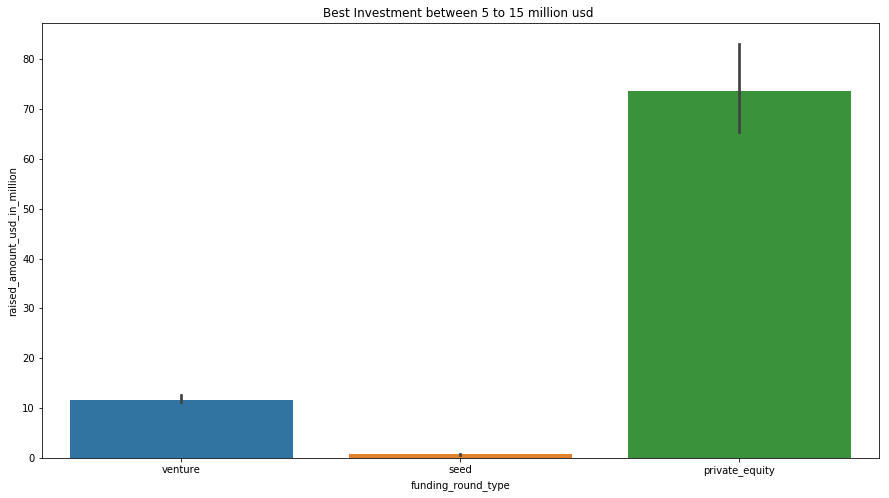

In [1796]:
for_plot1 = master_frame.loc[master_frame['funding_round_type']=='venture']
for_plot2 = master_frame.loc[master_frame['funding_round_type']=='seed']
for_plot3 = master_frame.loc[master_frame['funding_round_type']=='private_equity']
frames = [for_plot1, for_plot2, for_plot3]
master_frame_with_3_type_funding = pd.concat(frames)

plt.figure(figsize=(15, 8))
plt.title('Best Investment between 5 to 15 million usd ');
sns.barplot(x='funding_round_type', y='raised_amount_usd_in_million', data=master_frame_with_3_type_funding)
plt.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT. 
As bellow plot tells USA(United State of America) is highest english speaking country then GBR(United Kingdom) then IND(India)

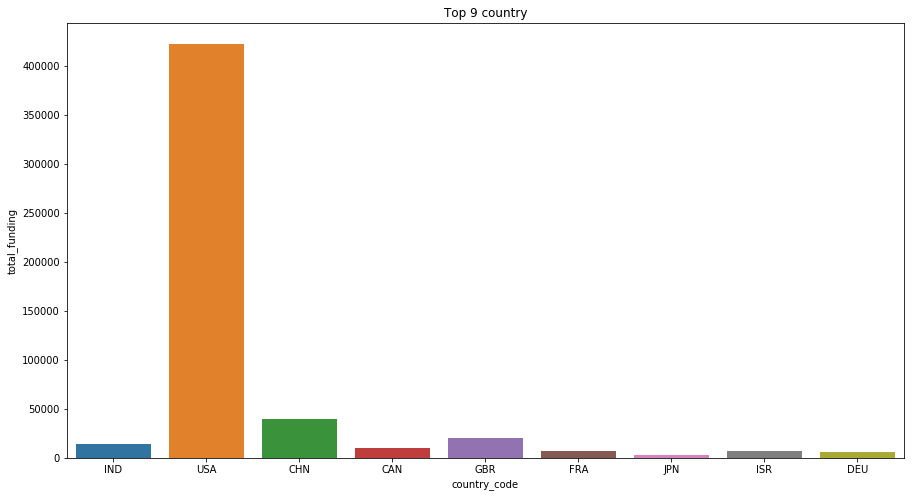

In [1797]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT. 
plt.figure(figsize=(15, 8))
plt.title('Top 9 country');
sns.barplot(x='country_code', y='total_funding', data=top9)
plt.show()

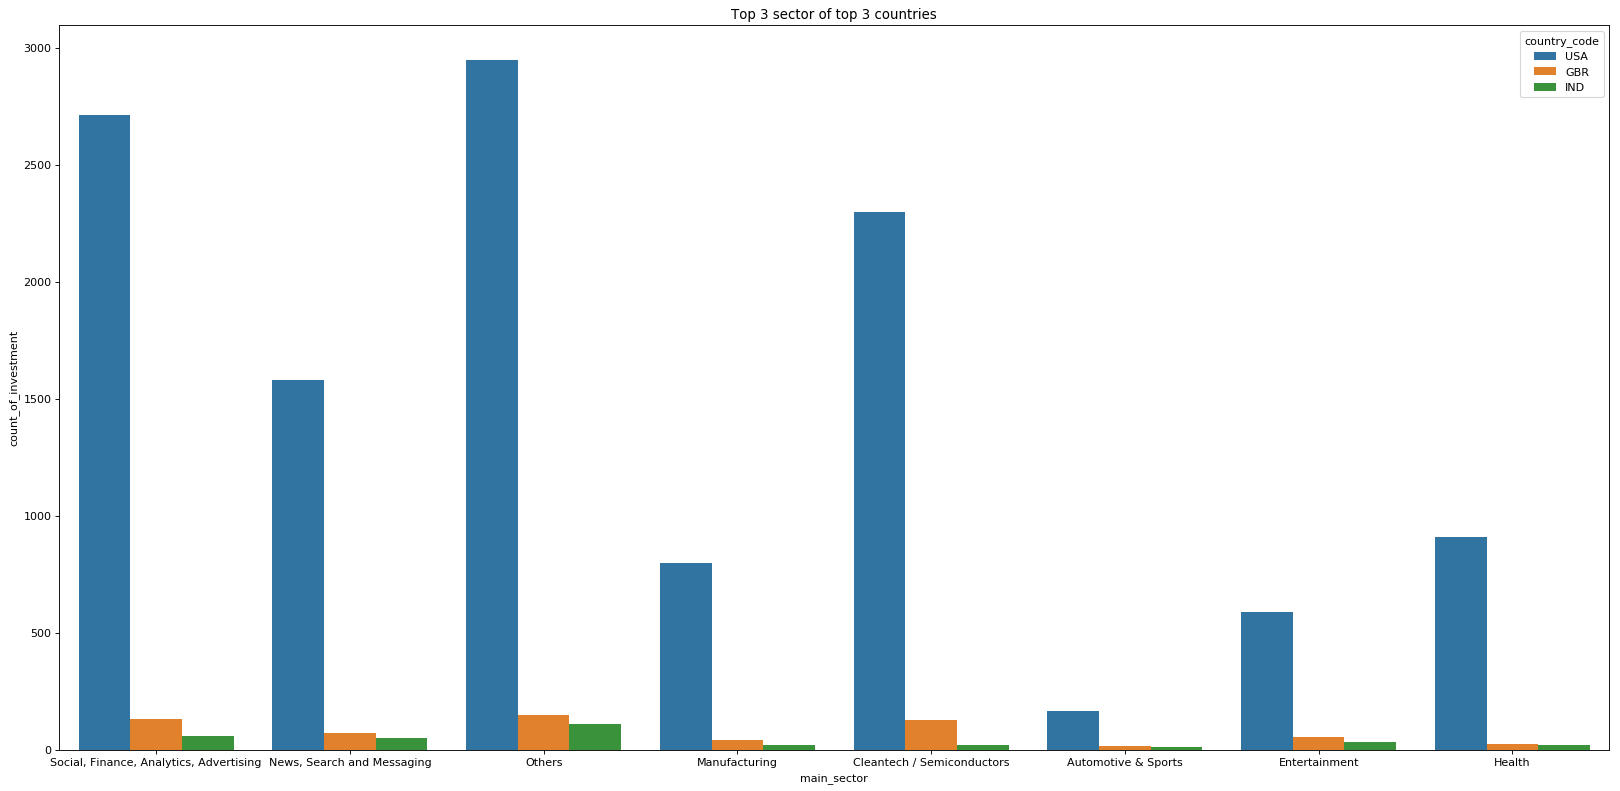

In [1802]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
# (for the chosen investment type FT). 
frame = [D1,D2,D3]
final = pd.concat(frame)
plt.figure(num=None, figsize=(25, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title('Top 3 sector of top 3 countries');
sns.barplot(x='main_sector', y='count_of_investment', hue="country_code", data=final, estimator=np.median)
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries
Bellow plot will show top3 Sector for top3 countries

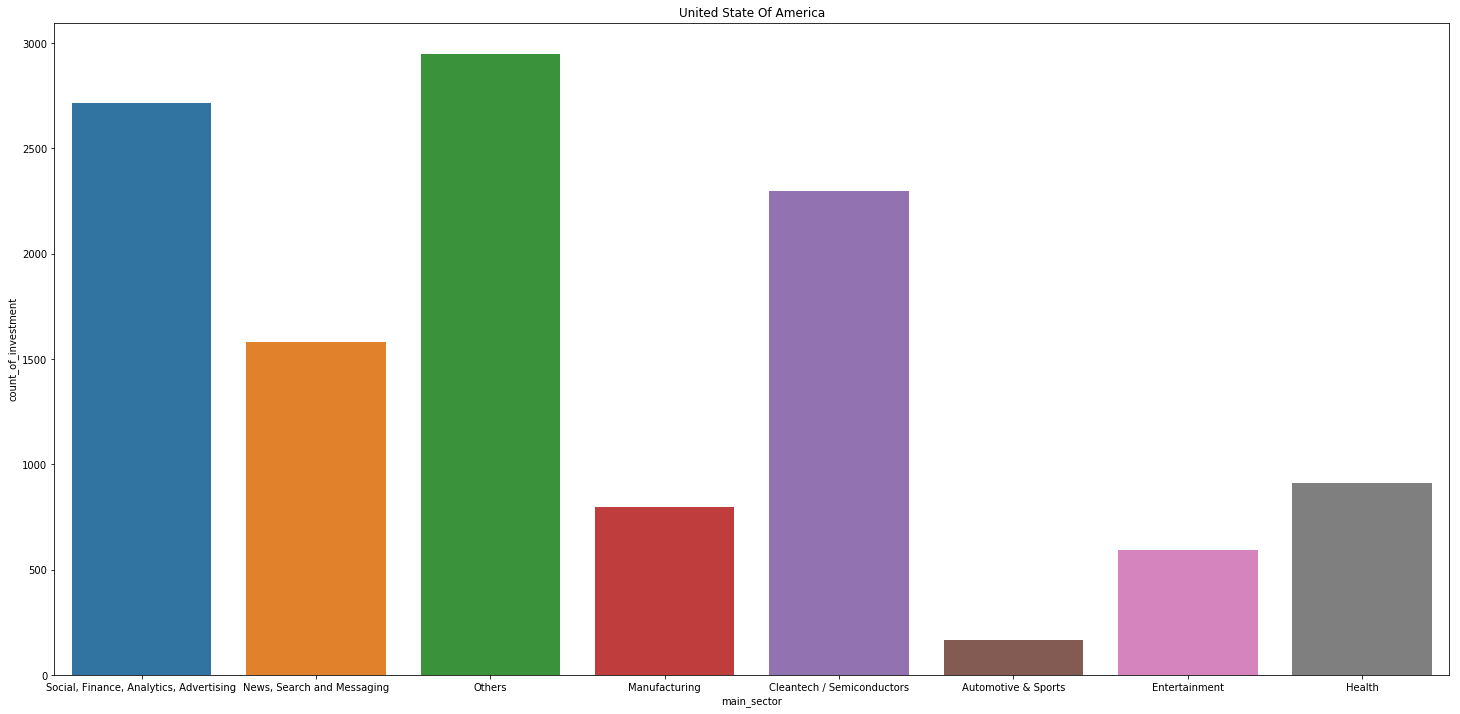

In [1804]:
# USA country main_sector and it's investment count as we can see 
# Others is top then (Social, Finance, Analytics, Advertising) then Cleantech / Semiconductors

plt.figure(figsize=(25, 12))
plt.title('United State Of America');
sns.barplot(x='main_sector', y='count_of_investment', data=D1)
plt.show()

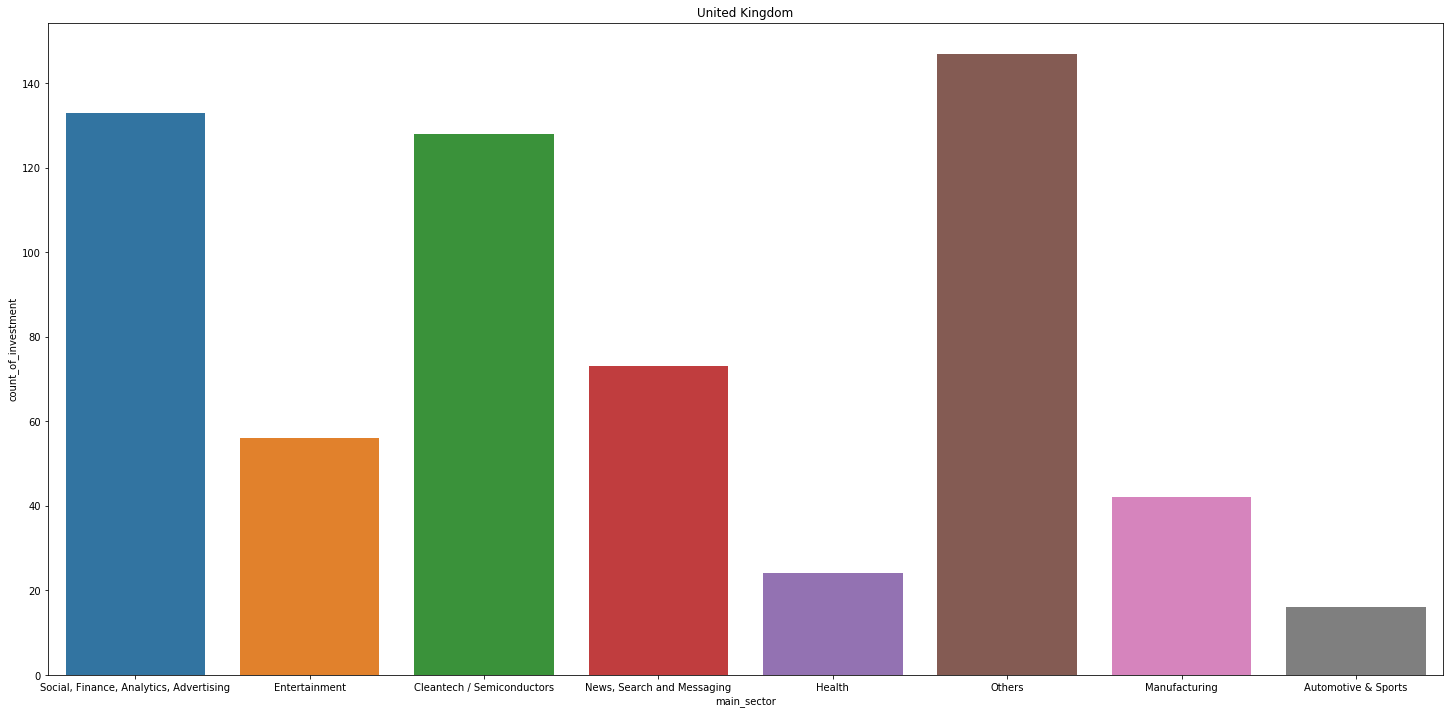

In [1805]:
# GBR(United Kingdom) country main_sector and it's investment count as we can see 
# Others is top then (Social, Finance, Analytics, Advertising) then (Cleantech / Semiconductors)
plt.figure(figsize=(25, 12))
plt.title('United Kingdom');
sns.barplot(x='main_sector', y='count_of_investment', data=D2)
plt.show()

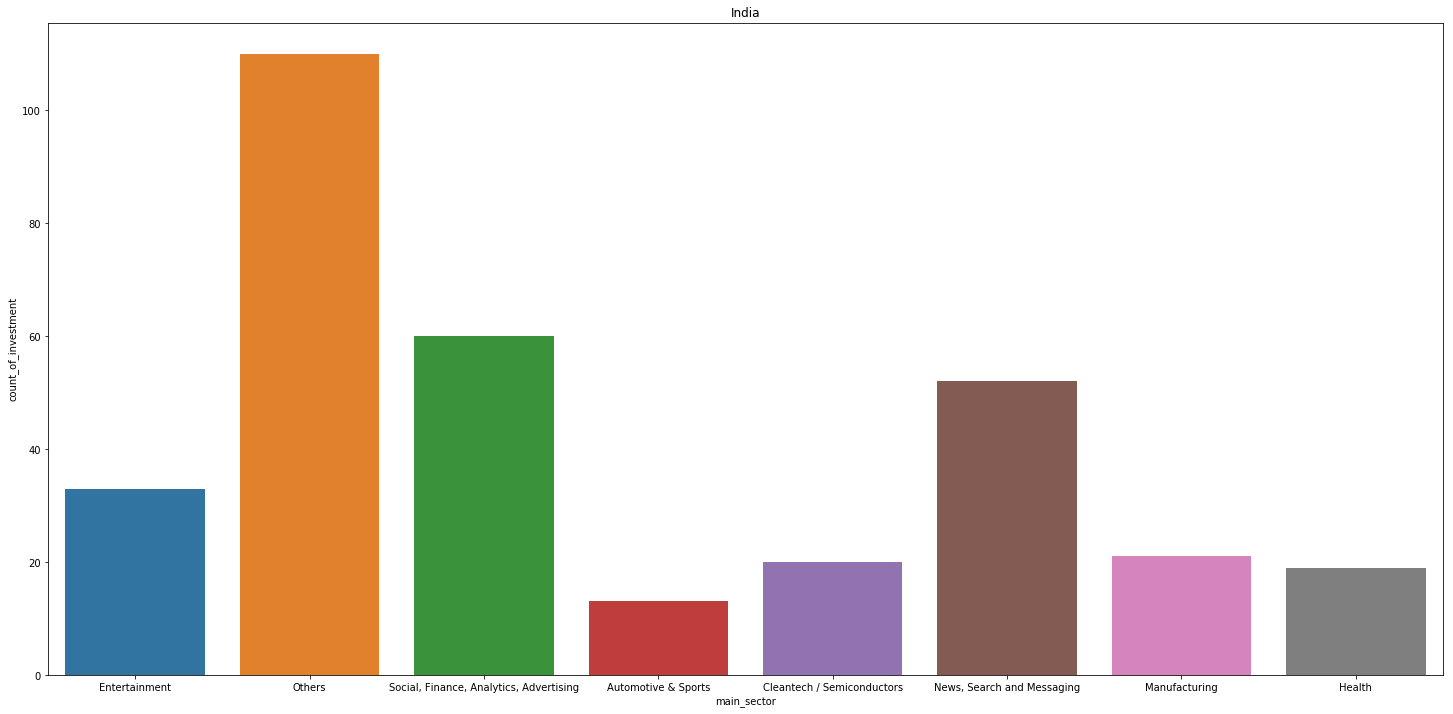

In [1806]:
# IND(India) country main_sector and it's investment count as we can see 
# Others is top then (Social, Finance, Analytics, Advertising) then (News, Search and Messaging)
plt.figure(figsize=(25, 12))
plt.title('India');
sns.barplot(x='main_sector', y='count_of_investment', data=D3)
plt.show()